In [ ]:
#Homework 3: Alexander Jenouri - RIN: 661959489

(50246, 1)
[2 2 2 ... 1 1 1]


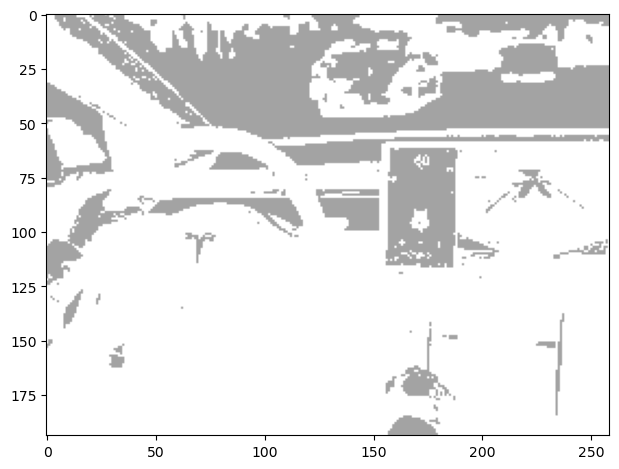

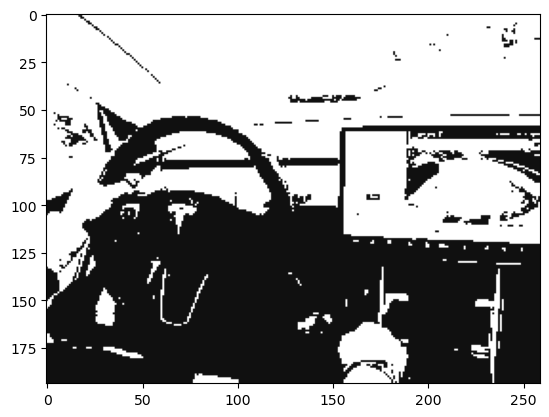

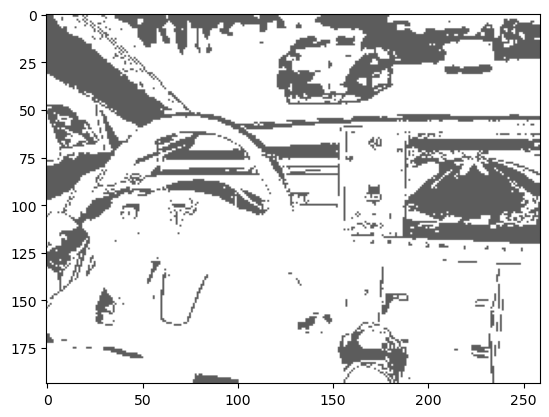

In [323]:
#Problem 1

import skimage.io
from skimage.color import rgb2gray

original = skimage.io.imread('seg2.jpg')
grayscale = rgb2gray(original)
skimage.io.imshow(grayscale)

image_gray = grayscale.reshape(grayscale.shape[0] * grayscale.shape[1], 1)
print(image_gray.shape)

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
n = 3
skmodel = KMeans(
    n_clusters=n,
    init='k-means++',
    n_init=1,
    max_iter=300,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)

skmodel.fit(image_gray)
clustered = skmodel.cluster_centers_[skmodel.labels_]
labels = skmodel.labels_

#df = pd.DataFrame()
#df['skmodel_labels'] = skmodel_labels

print(labels)

for n in range(n):
    image_cluster = []
    for i in range(len(labels)):
        if(labels[i]) == n:
            image_cluster.append(float(clustered[i]))
        else:
            image_cluster.append(1)

    if(n==1):
        image_fix= np.array(image_cluster).reshape(grayscale.shape)
        
    reshape_clustered = np.array(image_cluster).reshape(grayscale.shape)
    plt.imshow(reshape_clustered, cmap=plt.get_cmap("gray"),vmin=0, vmax=1)
    plt.show()

In [353]:
#Problem 2

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

original = np.loadtxt("housing_prices.txt", skiprows=1, dtype='float', delimiter=",")

X_orig = original[:,0]
X = np.zeros((len(X_orig),1))
X = np.insert(X,0,1, axis=1)
X[:,1] = X_orig

y = np.zeros((len(X_orig),1))
y[:,0] = original[:,1]
m = y.size

def h(w,X):
    return np.dot(X,w)
def mse(w,X,y): 
    return float((1./(2*m)) * np.dot((h(w,X)-y).T,(h(w,X)-y)))

def gradient_descend(X, batch_size, w_start = np.zeros(2)):
    w = w_start
    J_values = [] 
    w_store = [] 
    n_batches = len(X) // batch_size
    for _ in range(iterations):
        for i in range(n_batches):
            b_start = i * batch_size
            b_end = (i + 1) * batch_size
            X_batch = X[b_start:b_end, :]
            y_batch = y[b_start:b_end, :]
            
            temp_w = w
            J_values.append(mse(w,X_batch,y_batch))
            w_store.append(list(w[:,0]))
        
        for j in range(len(temp_w)):
            temp_w[j] = w[j] - (alpha/m)*np.sum((h(w,X) - y)*np.array(X[:,j]).reshape(m,1))
        w = temp_w
                
    return w, w_store, J_values

def predict(w, xval):
    return w[0] + w[1]*xval


iterations = 200
alpha = 0.01 # learning rate
w_start = np.zeros((X.shape[1],1))

w1, w_store1, J_values1 = gradient_descend(X,1,w_start)
w5, w_store5, J_values5 = gradient_descend(X,5,w_start)
w10, w_store10, J_values10 = gradient_descend(X,10,w_start)
w20, w_store20, J_values20 = gradient_descend(X,20,w_start)

#Plots for 1,5,10, and 20 are in the following code blocks

C:\Users\jenoua\AppData\Local\Temp\ipykernel_12992\2305694116.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



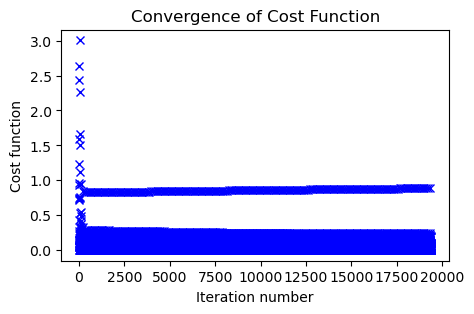

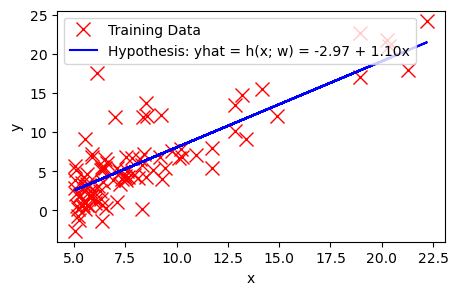

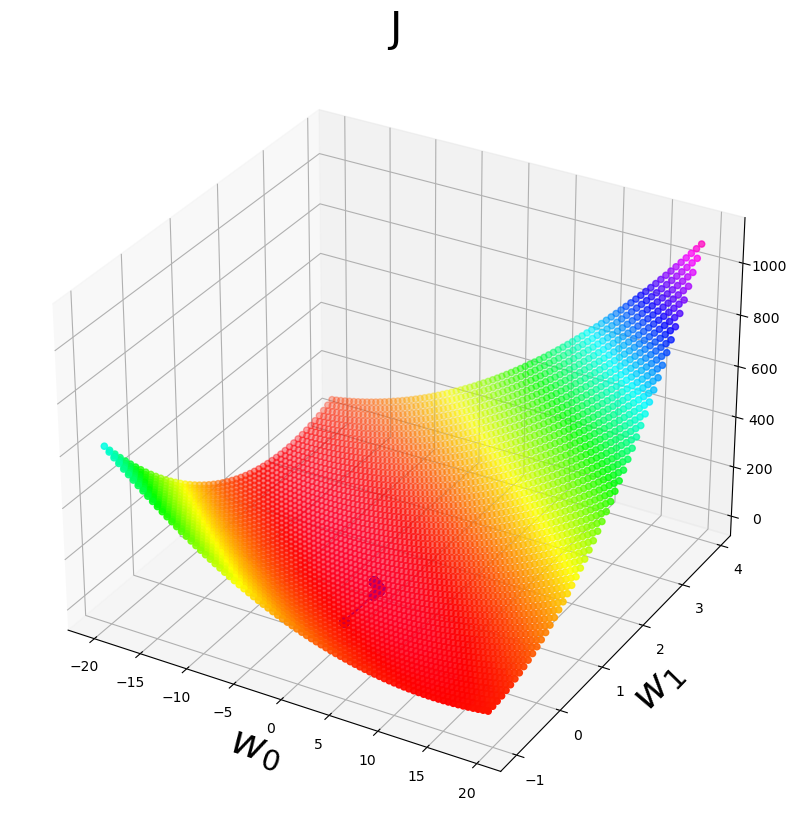

In [354]:
#Problem 2 - Batch = 1

#Convergence
plt.figure(figsize=(5,3))
plt.plot(range(len(J_values1)),J_values1,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

#Linear Model
plt.figure(figsize=(5,3))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(w1,X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w1[0],w1[1])) 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#J function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.plot([x[0] for x in w_store1],[x[1] for x in w_store1],J_values1,'bo-')
plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.show()

C:\Users\jenoua\AppData\Local\Temp\ipykernel_12992\2347559046.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



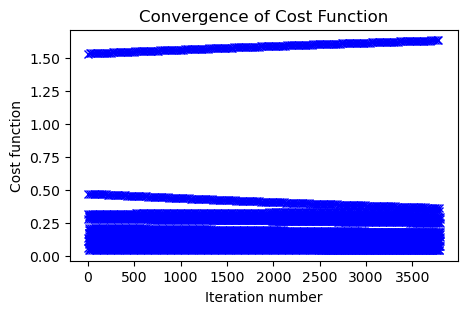

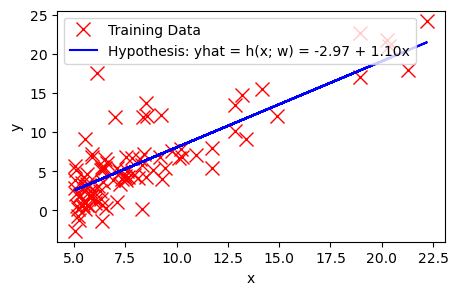

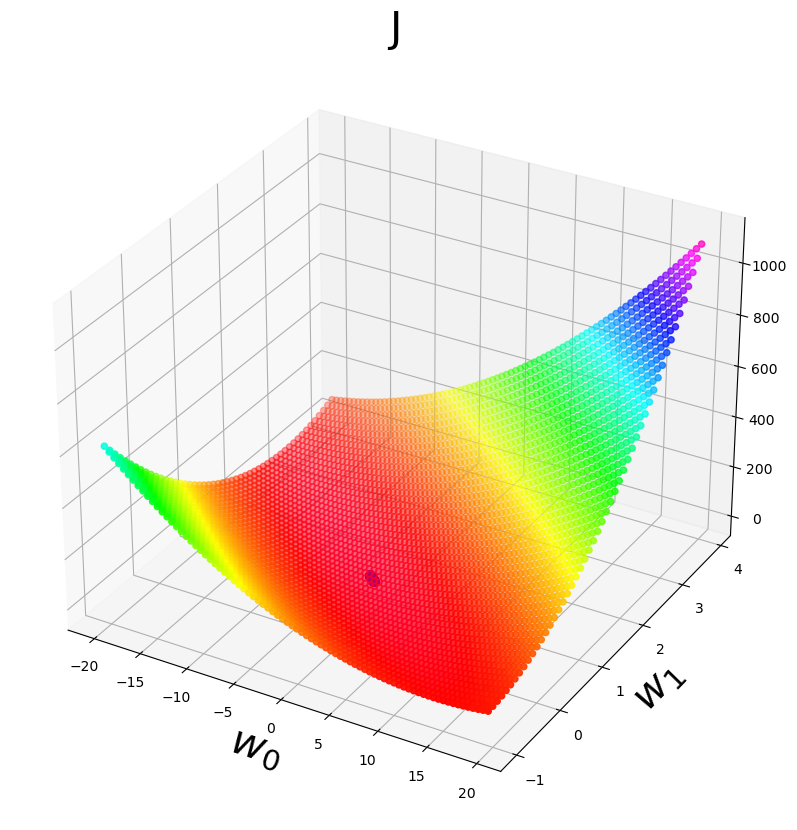

In [356]:
#Problem 2 - Batch = 5

#Convergence
plt.figure(figsize=(5,3))
plt.plot(range(len(J_values5)),J_values5,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

#Linear Model
plt.figure(figsize=(5,3))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(w5,X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w5[0],w5[1])) 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#J function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.plot([x[0] for x in w_store5],[x[1] for x in w_store5],J_values5,'bo-')
plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.show()

C:\Users\jenoua\AppData\Local\Temp\ipykernel_12992\1327681923.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



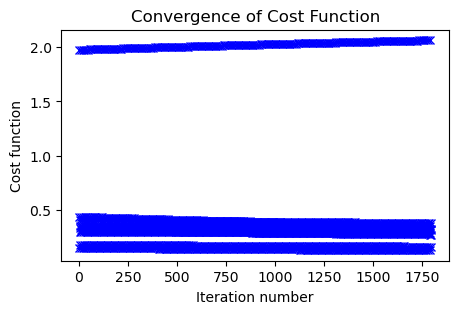

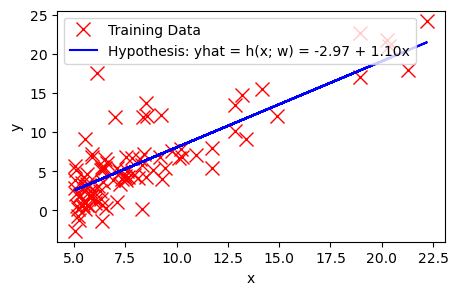

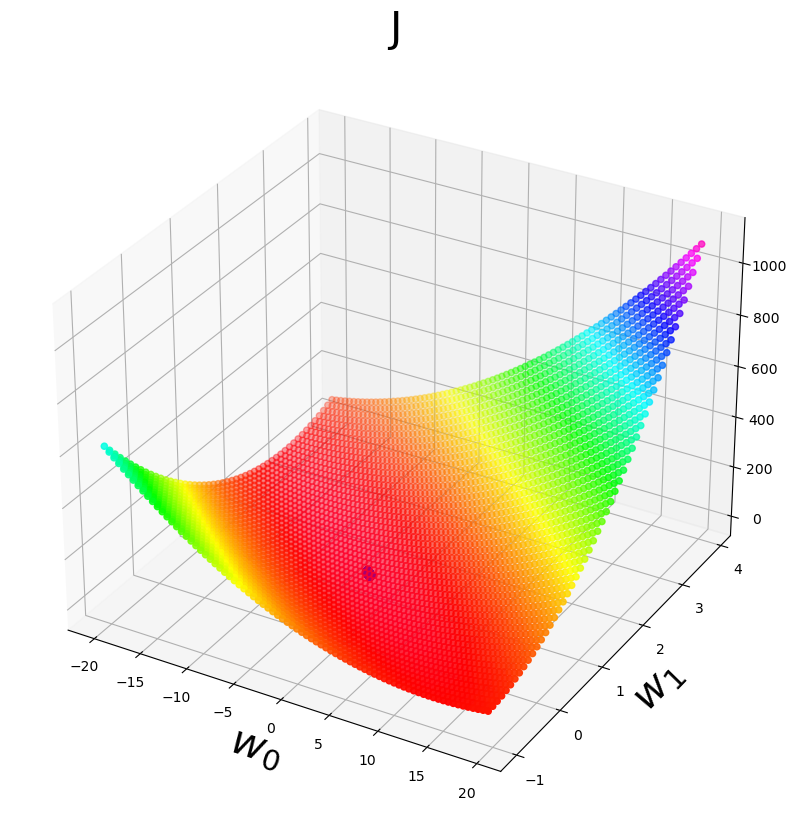

In [357]:
#Problem 2 - Batch = 10

#Convergence
plt.figure(figsize=(5,3))
plt.plot(range(len(J_values10)),J_values10,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

#Linear Model
plt.figure(figsize=(5,3))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(w10,X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w10[0],w10[1])) 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#J function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.plot([x[0] for x in w_store10],[x[1] for x in w_store10],J_values10,'bo-')
plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.show()

C:\Users\jenoua\AppData\Local\Temp\ipykernel_12992\3049644051.py:20: MatplotlibDeprecationWarning:

Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().



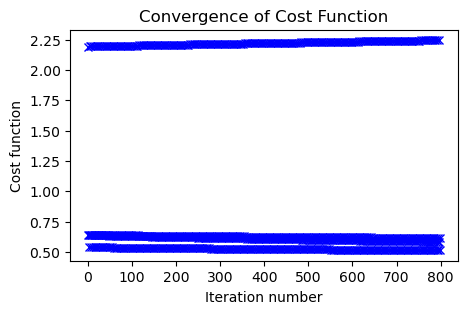

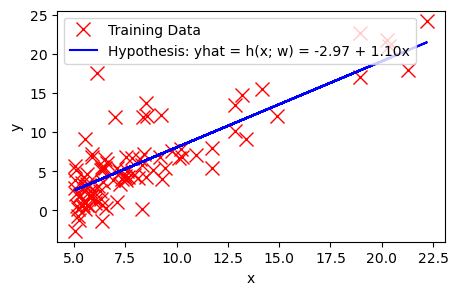

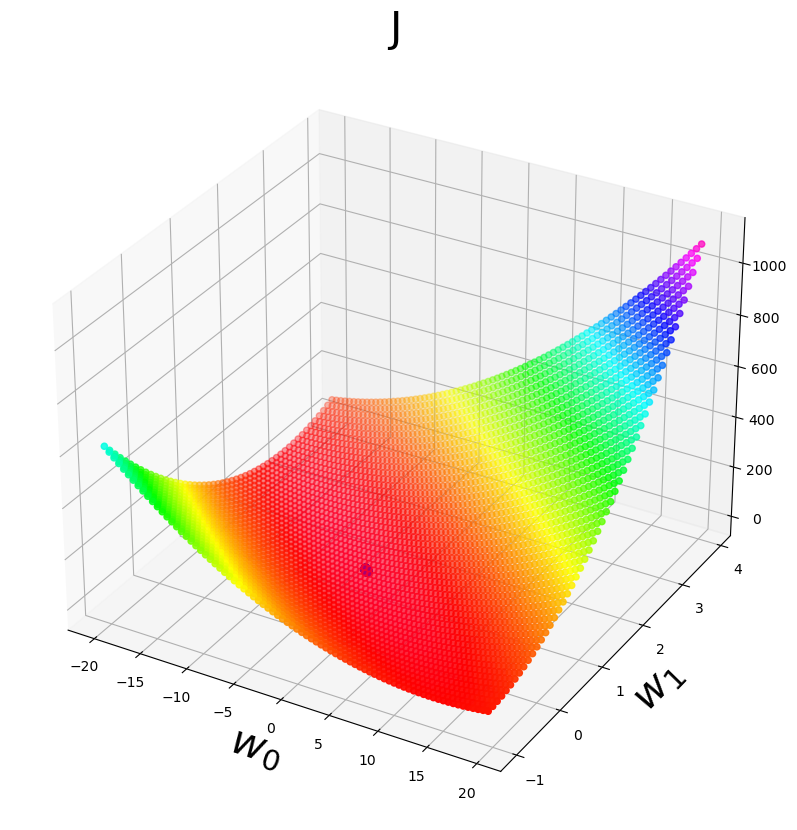

All batch sizes predict the house price to be $146318.7649010801.
When the batch size equals one, the model becomes a regular Batch Gradient Descent (BGD), since the batch is the entire data set


In [364]:
#Problem 2 - Batch = 20

#Convergence
plt.figure(figsize=(5,3))
plt.plot(range(len(J_values20)),J_values20,'bx')
plt.title("Convergence of Cost Function")
plt.xlabel("Iteration number")
plt.ylabel("Cost function")

#Linear Model
plt.figure(figsize=(5,3))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],predict(w20,X[:,1]),'b-',label = 'Hypothesis: yhat = h(x; w) = %0.2f + %0.2fx'%(w20[0],w20[1])) 
plt.ylabel('y')
plt.xlabel('x')
plt.legend()

#J function
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

xvals = np.arange(-20,20,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for _ in xvals:
    for _k in yvals:
        myxs.append(_)
        myys.append(_k)
        myzs.append(mse(np.array([[_], [_k]]),X,y))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('gist_rainbow'))

plt.plot([x[0] for x in w_store20],[x[1] for x in w_store20],J_values20,'bo-')
plt.xlabel(r'$w_0$',fontsize=30)
plt.ylabel(r'$w_1$',fontsize=30)
plt.title('J',fontsize=30)
plt.show()

predictions = predict(w20, [16.0])*10000
print("All batch sizes predict the house price to be ${}.".format(predictions[0]))
print("When the batch size equals one, the model becomes a regular Batch Gradient Descent (BGD), since the batch is the entire data set")

              precision    recall  f1-score   support

           0       0.87      0.62      0.73        64
           1       0.81      0.94      0.87       107

    accuracy                           0.82       171
   macro avg       0.84      0.78      0.80       171
weighted avg       0.83      0.82      0.82       171

The model has chosen to use worst concavity and worst compactness as the two best features.
The metrics are displayed in the classification report, one of which being accuracy = 82%.


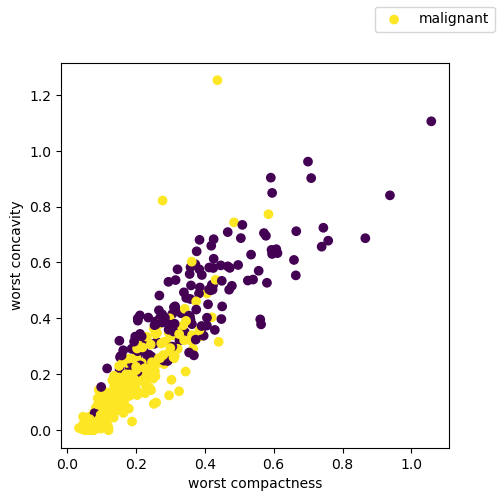

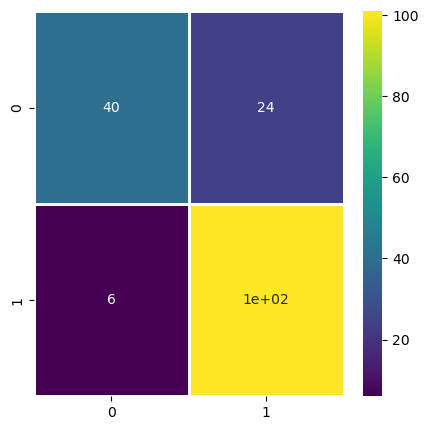

In [345]:
#Problem 3

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = load_breast_cancer(as_frame = True)

df_data = pd.DataFrame(data=data.data, columns=data.feature_names)
df_target = pd.DataFrame(data=data.target)

X_train, X_test, y_train, y_test=train_test_split(
    df_data,df_target,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=df_target)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

LogReg = LogisticRegression(solver='lbfgs', max_iter=10000)
rfe = RFE(LogReg, n_features_to_select = 2).fit(X_train,y_train)

df_features = pd.DataFrame()
df_features['feature names'] = data.feature_names
df_features['selected: True/False'] = rfe.support_
feature_name = np.arange(0, len(data.feature_names))
feature_name = feature_name[rfe.support_]

fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(X_train[data.feature_names[feature_name[0]]], X_train[data.feature_names[feature_name[1]]], c=y_train)
ax.set_xlabel(data.feature_names[feature_name[0]])
ax.set_ylabel(data.feature_names[feature_name[1]])
fig.legend(['malignant', 'benign'])

#Classification Metrics

fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, predictions),linewidths=2, annot=True, cmap='viridis', cbar=True, ax=ax);  
print(classification_report(y_test, predictions))

print("The model has chosen to use worst concavity and worst compactness as the two best features.")
print("The metrics are displayed in the classification report, one of which being accuracy = 82%.")

In [365]:
#Problem 4

import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


original = np.loadtxt("housing_prices.txt", skiprows=1, dtype='float', delimiter=",")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(
    original[:,0],original[:,1],
    test_size=0.30,
    random_state=123,
    shuffle=True)

model = Sequential()
model.add(Dense(2, input_dim=1,activation='relu'))
model.add(Dense(1))

opt = optimizers.SGD(learning_rate=0.0000001)
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)
history = model.fit(X_train,y_train,validation_data=(X_test, y_test), epochs=5000,batch_size=10, verbose=0)


predictions = model.predict([16.5])*10000
print("According to the model, the value of a home at 165,000 population is ${}.".format(predictions[0]))

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(original[:,0],original[:,1],'b+',markersize=12)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

ModuleNotFoundError: No module named 'tensorflow'